<a href="https://colab.research.google.com/github/shivamrai009/Credit-Card-Behaviour-Score-Prediction-Using-Classification-and-Risk-Based-Techniques/blob/main/finclub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
uploaded = files.upload()


Saving train_dataset_final1.csv to train_dataset_final1.csv


In [5]:
import pandas as pd

df = pd.read_csv('train_dataset_final1.csv')
df.head()


,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default
0,5017,2,0,2,60000,25.0,2,2,2,0,...,20750.63,2000.21,0.00,1134.85,1821.78,1500.03,1500.24,41511.50,0.03,0
1,5018,2,1,1,290000,24.0,0,0,-2,-2,...,1350.30,0.00,0.17,0.00,2700.10,0.00,1349.72,2534.50,0.27,0
2,5019,1,0,2,180000,63.0,0,0,0,0,...,52991.51,2086.94,2199.99,1845.66,2000.35,1923.00,1999.78,50422.00,0.04,0
3,5020,1,1,2,210000,43.0,0,0,0,0,...,76945.47,3348.07,3380.91,3400.45,2683.97,2744.00,2892.10,86229.50,0.04,0
4,5021,2,0,1,280000,32.0,-2,-2,-2,-2,...,1.35,999.78,3186.27,45027.78,2100.09,0.01,0.27,11814.33,0.72,0


In [6]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25247 entries, 0 to 25246
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_ID         25247 non-null  int64  
 1   marriage            25247 non-null  int64  
 2   sex                 25247 non-null  int64  
 3   education           25247 non-null  int64  
 4   LIMIT_BAL           25247 non-null  int64  
 5   age                 25121 non-null  float64
 6   pay_0               25247 non-null  int64  
 7   pay_2               25247 non-null  int64  
 8   pay_3               25247 non-null  int64  
 9   pay_4               25247 non-null  int64  
 10  pay_5               25247 non-null  int64  
 11  pay_6               25247 non-null  int64  
 12  Bill_amt1           25247 non-null  float64
 13  Bill_amt2           25247 non-null  float64
 14  Bill_amt3           25247 non-null  float64
 15  Bill_amt4           25247 non-null  float64
 16  Bill

,0
Customer_ID,0
marriage,0
sex,0
education,0
LIMIT_BAL,0
age,126
pay_0,0
pay_2,0
pay_3,0
pay_4,0


In [7]:
# Replace -2 and -1 with 0
pay_cols = ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']
df[pay_cols] = df[pay_cols].replace([-2, -1], 0)

# One-hot encode categorical features (optional if using tree-based models)
df = pd.get_dummies(df, columns=['sex', 'education', 'marriage'], drop_first=True)


In [9]:
print(df.columns.tolist())


['Customer_ID', 'LIMIT_BAL', 'age', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'Bill_amt1', 'Bill_amt2', 'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6', 'AVG_Bill_amt', 'PAY_TO_BILL_ratio', 'next_month_default', 'sex_1', 'education_1', 'education_2', 'education_3', 'education_4', 'education_5', 'education_6', 'marriage_1', 'marriage_2', 'marriage_3']


In [10]:
X = df.drop(['Customer_ID', 'next_month_default'], axis=1)
y = df['next_month_default']


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [13]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[3938  157]
 [ 638  317]]
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      4095
           1       0.67      0.33      0.44       955

    accuracy                           0.84      5050
   macro avg       0.76      0.65      0.68      5050
weighted avg       0.82      0.84      0.82      5050



In [15]:
X_train.isnull().sum()


,0
LIMIT_BAL,0
age,102
pay_0,0
pay_2,0
pay_3,0
pay_4,0
pay_5,0
pay_6,0
Bill_amt1,0
Bill_amt2,0


In [16]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)


In [18]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

model.fit(X_res, y_res)


RandomForestClassifier(random_state=42)

In [19]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(class_weight='balanced', max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print(classification_report(y_test, y_pred_lr))


              precision    recall  f1-score   support

           0       0.89      0.83      0.86      4095
           1       0.44      0.58      0.50       955

    accuracy                           0.78      5050
   macro avg       0.67      0.70      0.68      5050
weighted avg       0.81      0.78      0.79      5050



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [47]:


# Assuming y_test is true labels and y_pred_xgb is predictions from XGBoost
f2_score = fbeta_score(y_test, y_pred_lr, beta=2)
print("F2 Score:", f2_score)
f2_score = fbeta_score(y_test, y_pred_lr, beta=2)
print("F2 Score:", f2_score)


F2 Score: 0.5443588223671211
F2 Score: 0.5443588223671211


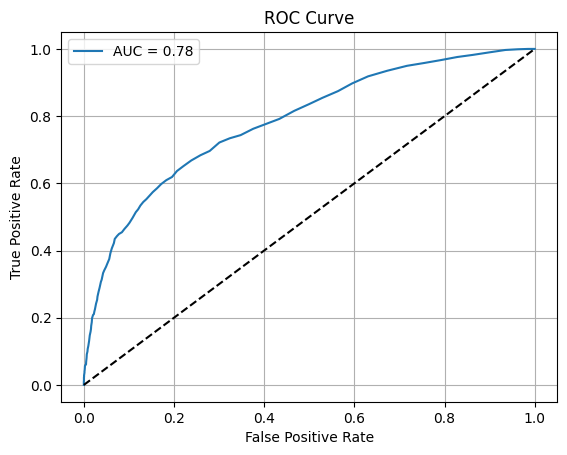

In [20]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

y_probs = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_probs):.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()


In [23]:
from google.colab import files
uploaded = files.upload()  # Upload test.csv or whatever your file is


Saving test.csv to test.csv


In [24]:
df_test = pd.read_csv("test.csv")  # Replace with actual filename if different


In [25]:
Customer_ID_test = df_test['Customer_ID']


In [26]:
# Replace -2 and -1 with 0 in payment columns
df_test[pay_cols] = df_test[pay_cols].replace([-2, -1], 0)

# One-hot encoding categorical features (same as training)
df_test = pd.get_dummies(df_test, columns=['sex', 'education', 'marriage'], drop_first=True)

# Ensure same columns as X_train
missing_cols = set(X_train.columns) - set(df_test.columns)
for col in missing_cols:
    df_test[col] = 0  # add missing dummy columns

# Ensure column order is same
df_test = df_test[X_train.columns]


In [27]:
y_test_pred = model.predict(df_test)


In [28]:
submission = pd.DataFrame({
    'Customer': Customer_ID_test,
    'next_month_default': y_test_pred
})


In [31]:
enrollment_number = "22115140"  # Replace with your enrollment number
submission_file = f'submission_{enrollment_number}.csv'
submission.to_csv(submission_file, index=False)
files.download(submission_file)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [32]:
!pip install xgboost


In [33]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix

# Optional: Convert to DMatrix format (efficient)
# dtrain = xgb.DMatrix(X_train, label=y_train)
# dtest = xgb.DMatrix(X_test)

model_xgb = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
model_xgb.fit(X_train, y_train)

# Predict
y_pred_xgb = model_xgb.predict(X_test)

# Evaluate
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:09:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[[3898  197]
 [ 627  328]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      4095
           1       0.62      0.34      0.44       955

    accuracy                           0.84      5050
   macro avg       0.74      0.65      0.67      5050
weighted avg       0.82      0.84      0.82      5050



In [34]:
from sklearn.metrics import fbeta_score
print("F2 Score:", fbeta_score(y_test, y_pred_xgb, beta=2))


F2 Score: 0.37744533947065595


In [38]:
# Upload the test data file
uploaded = files.upload()
test_df = pd.read_csv('test.csv')

# Preprocess test data the same way as train data:

# Replace -2 and -1 with 0 in pay columns
pay_cols = ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']
test_df[pay_cols] = test_df[pay_cols].replace([-2, -1], 0)

# One-hot encode categorical variables, same columns as train (sex, education, marriage)
test_df = pd.get_dummies(test_df, columns=['sex', 'education', 'marriage'], drop_first=True)

# Sometimes test_df might miss some dummy columns that were present in train, so add missing ones with 0:
for col in X.columns:
    if col not in test_df.columns:
        test_df[col] = 0

# Ensure column order matches training features
test_df = test_df[X.columns]

# Predict with your trained XGBoost model
test_preds = model_xgb.predict(test_df)


Saving test.csv to test (3).csv


In [41]:
print(test_df.columns)


Index(['LIMIT_BAL', 'age', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5',
       'pay_6', 'Bill_amt1', 'Bill_amt2', 'Bill_amt3', 'Bill_amt4',
       'Bill_amt5', 'Bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3',
       'pay_amt4', 'pay_amt5', 'pay_amt6', 'AVG_Bill_amt', 'PAY_TO_BILL_ratio',
       'sex_1', 'education_1', 'education_2', 'education_3', 'education_4',
       'education_5', 'education_6', 'marriage_1', 'marriage_2', 'marriage_3'],
      dtype='object')


In [42]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
test_df = pd.read_csv('test.csv')

# Strip whitespace from columns
test_df.columns = test_df.columns.str.strip()

# Check all columns and first rows
print(test_df.columns)
print(test_df.head())


Saving test.csv to test (4).csv
Index(['Customer_ID', 'marriage', 'sex', 'education', 'LIMIT_BAL', 'age',
       'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'Bill_amt1',
       'Bill_amt2', 'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6',
       'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'AVG_Bill_amt', 'PAY_TO_BILL_ratio'],
      dtype='object')
   Customer_ID  marriage  sex  education  LIMIT_BAL  age  pay_0  pay_2  pay_3  \
0            1         1    1          2     220000   32      0      0      0   
1            2         2    0          1     350000   35     -1     -1     -1   
2            3         2    1          1     310000   39      0      0      0   
3            4         1    0          2      20000   47      0      0      0   
4            5         2    1          2     500000   30      0      0      0   

   pay_4  ...  Bill_amt5  Bill_amt6  pay_amt1  pay_amt2  pay_amt3  pay_amt4  \
0      0  ...   17831.13   15670.47 

In [43]:
import pandas as pd

# Load test data
test_df = pd.read_csv('test.csv')

# Replace -2 and -1 with 0 in pay columns (same as training)
pay_cols = ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']
test_df[pay_cols] = test_df[pay_cols].replace([-2, -1], 0)

# One-hot encode categorical columns to match training
test_df = pd.get_dummies(test_df, columns=['sex', 'education', 'marriage'], drop_first=True)

# Add missing dummy columns that were in training but missing here
for col in X.columns:
    if col not in test_df.columns:
        test_df[col] = 0

# Reorder test_df columns to match training feature order
test_features = test_df[X.columns]

# Predict using your trained model (XGBoost here)
test_preds = model_xgb.predict(test_features)

# Prepare output DataFrame with Customer_ID and predictions
output = pd.DataFrame({
    'Customer_ID': test_df['Customer_ID'],
    'next_month_default_pred': test_preds
})

# Save predictions to CSV
output.to_csv('xgb_test_predictions.csv', index=False)

# Download CSV in Colab
from google.colab import files
files.download('xgb_test_predictions.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [44]:
from sklearn.metrics import fbeta_score

# Assuming y_test is true labels and y_pred_xgb is predictions from XGBoost
f2_score = fbeta_score(y_test, y_pred_xgb, beta=2)
print("F2 Score:", f2_score)


F2 Score: 0.37744533947065595


In [45]:
import numpy as np
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, fbeta_score
import xgboost as xgb

# Custom scorer for F2 score
f2_scorer = make_scorer(fbeta_score, beta=2)

# Calculate scale_pos_weight
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

# Initialize model with class weight
xgb_model = xgb.XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=scale_pos_weight,
)

# Parameter grid for Randomized Search
param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.3, 0.5],
}

# Randomized Search CV
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    scoring=f2_scorer,
    n_iter=30,
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1,
)

random_search.fit(X_train, y_train)

print("Best parameters:", random_search.best_params_)
print("Best F2 score on CV:", random_search.best_score_)

# Use best model
best_model = random_search.best_estimator_

# Predict probabilities on test set
y_probs = best_model.predict_proba(X_test)[:,1]

# Try threshold tuning for best F2
thresholds = np.arange(0.1, 0.9, 0.05)
best_threshold = 0.5
best_f2 = 0

for thr in thresholds:
    y_pred_thr = (y_probs >= thr).astype(int)
    score = fbeta_score(y_test, y_pred_thr, beta=2)
    if score > best_f2:
        best_f2 = score
        best_threshold = thr

print(f"Best threshold for F2: {best_threshold:.2f} with F2 score: {best_f2:.4f}")

# Final predictions using best threshold
y_pred_final = (y_probs >= best_threshold).astype(int)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred_final))
print(classification_report(y_test, y_pred_final))


Fitting 3 folds for each of 30 candidates, totalling 90 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:42:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters: {'subsample': 0.8, 'n_estimators': 100, 'min_child_weight': 5, 'max_depth': 3, 'learning_rate': 0.2, 'gamma': 0.5, 'colsample_bytree': 0.9}
Best F2 score on CV: 0.5608562664824346
Best threshold for F2: 0.35 with F2 score: 0.6021
[[2313 1782]
 [ 188  767]]
              precision    recall  f1-score   support

           0       0.92      0.56      0.70      4095
           1       0.30      0.80      0.44       955

    accuracy                           0.61      5050
   macro avg       0.61      0.68      0.57      5050
weighted avg       0.81      0.61      0.65      5050

